In [1]:
import sys
sys.path.append("/Users/david/Documents/code/fhmm/v1")

In [2]:
from importlib import reload
from src.classifiers_davidjames9610.test_a.config import config_location
import importlib
import src.classifiers_davidjames9610.test_a.config as base_config
reload(base_config)
config = importlib.import_module(base_config.config_location)
reload(config)
print(config.basedir)
import time

/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands


In [3]:
# time = 20 ms
# fs = 16000 = 1/t
# windows samples = 20 * 10^-3 * 1/1600
# = 0.2 * 1600 = 800

In [4]:
import pickle
import d_classifiers_to_results
import src.misc_davidjames9610.utils as utils
reload(d_classifiers_to_results)
sls = utils.load_pickle(config.samples_labels)

In [21]:
feature_key = 'lp'
classifier_key = 'fhmm'
features = utils.folder_pickles_to_dict(config.basedir + '/features', feature_key)
classifiers = utils.folder_pickles_to_dict(config.basedir + '/classifiers', classifier_key)

loading lp_RealNoise_UNDER_WATER_DRONE_SNR1.pickle
loading lp_GaussNoise_SNR20.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR60.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR40.pickle
loading lp_GaussNoise_SNR10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR5.pickle
loading lp_None_None.pickle
loading lp_GaussNoise_SNR40.pickle
loading lp_GaussNoise_SNR5.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR10.pickle
loading lp_GaussNoise_SNR1.pickle
loading lp_GaussNoise_SNR60.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR20.pickle
loading fhmm.pickle


In [22]:
results = {}
plot_cms = True
save_cms = True

In [23]:
import src.misc_davidjames9610.utils as utils
reload(utils)
reload(d_classifiers_to_results)
include_buffer = False
if include_buffer:
    d_classifiers_to_results.include_buffer_in_features(features, buffer_length=100, buffer_step=50)
    utils.dict_to_folder_pickles(config.basedir + '/features', features)

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands/plots/classification_annotations/' already exists, removing old files:  False
type: classification_annotations
For classifier: fhmm
  Testing for: lp_GaussNoise_SNR1


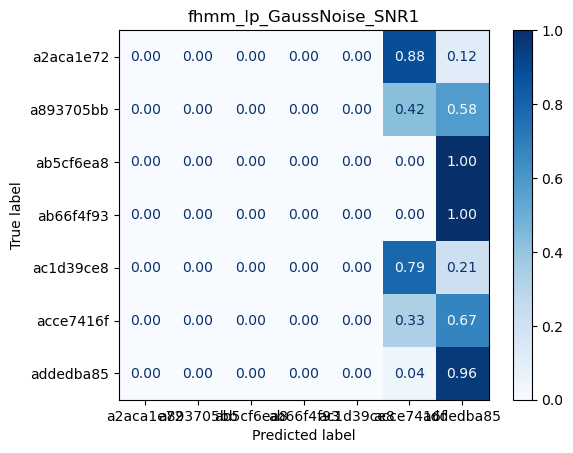

  Testing for: lp_GaussNoise_SNR10


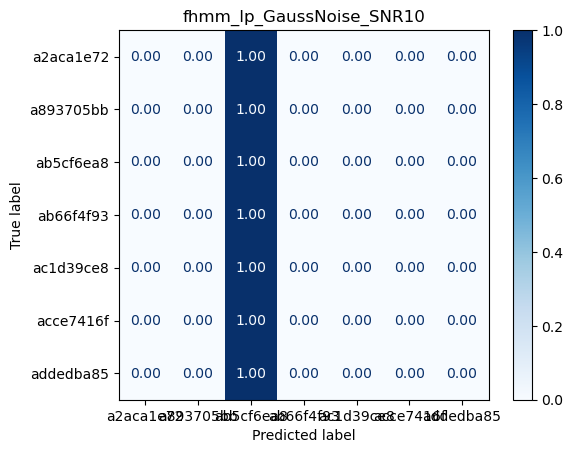

  Testing for: lp_GaussNoise_SNR20


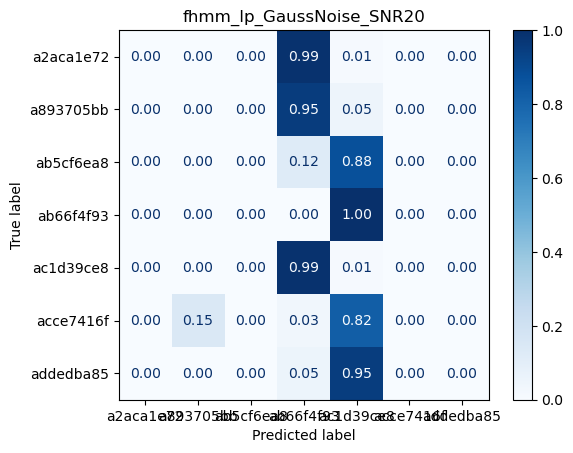

  Testing for: lp_GaussNoise_SNR40


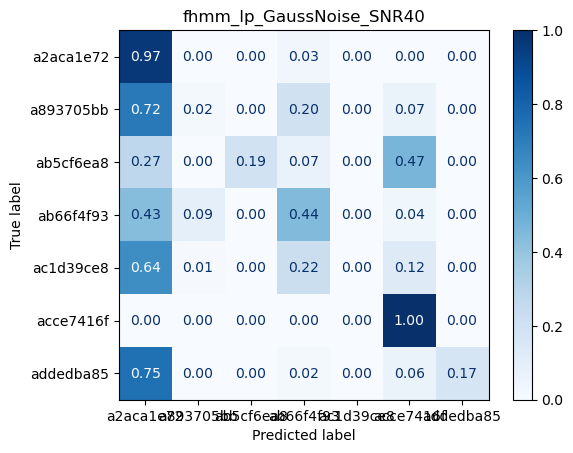

  Testing for: lp_GaussNoise_SNR5


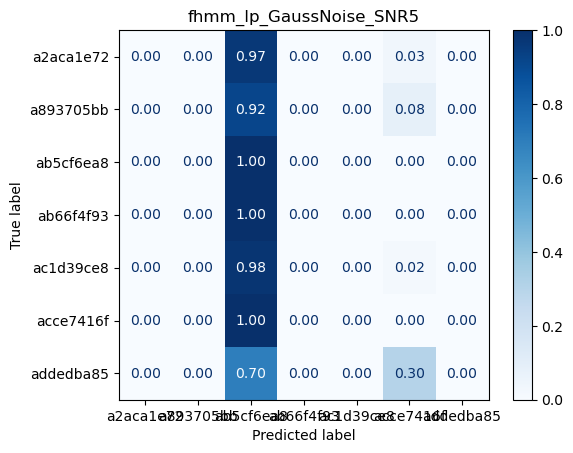

  Testing for: lp_GaussNoise_SNR60


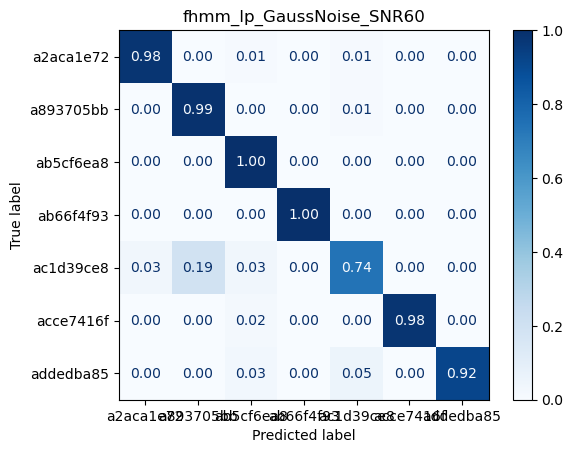

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR1


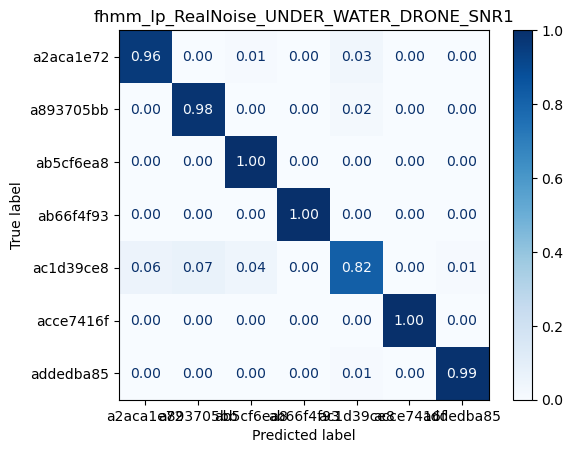

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR10


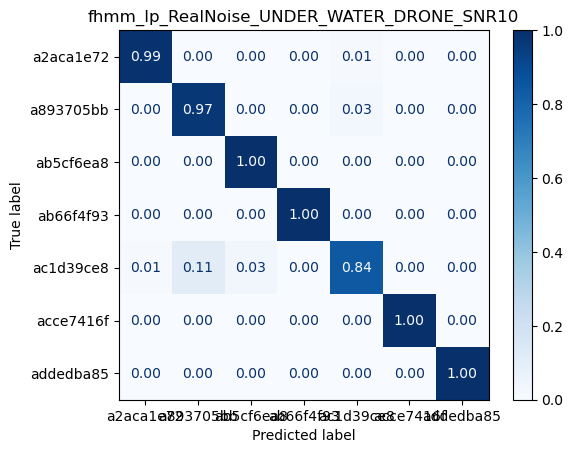

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR20


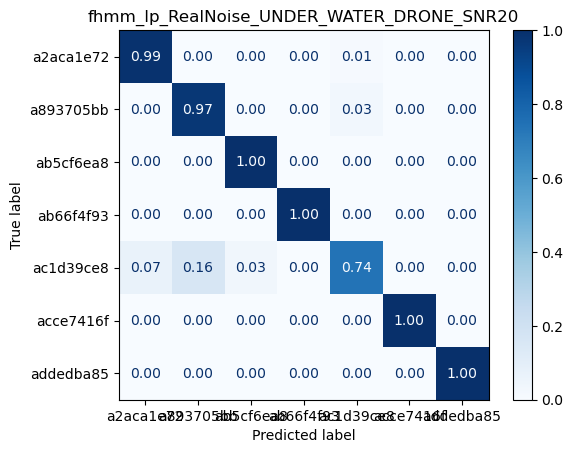

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR40


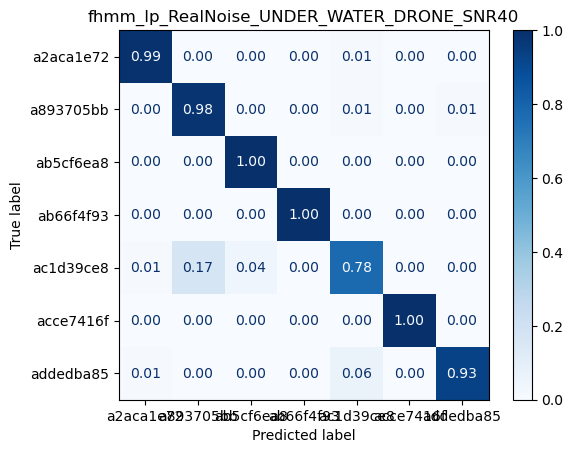

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR5


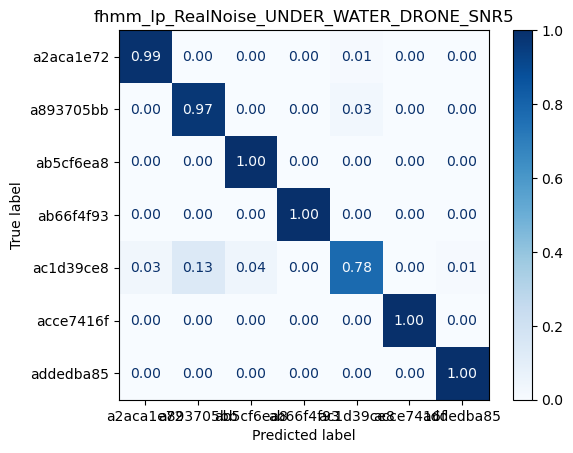

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR60


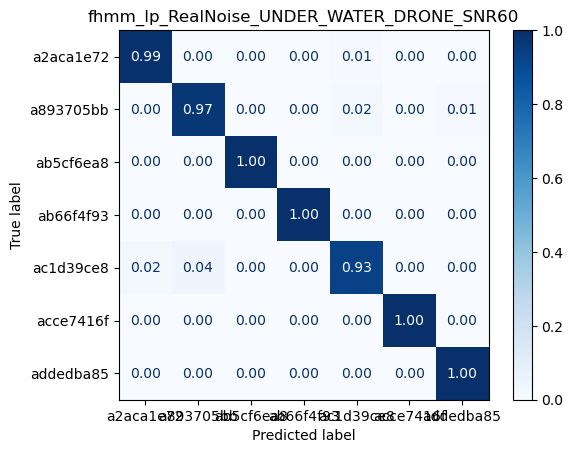

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands/results/classification_annotations/fhmm' already exists, removing old files:  True
saving / updating  lp_GaussNoise_SNR1
saving / updating  lp_GaussNoise_SNR10
saving / updating  lp_GaussNoise_SNR20
saving / updating  lp_GaussNoise_SNR40
saving / updating  lp_GaussNoise_SNR5
saving / updating  lp_GaussNoise_SNR60
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR1
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR10
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR20
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR40
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR5
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR60
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands/plots/classification_annotations_valg/' already exists, removing old files:  False
type: classification_annotations_valg
For classifier: fhmm
  Testi

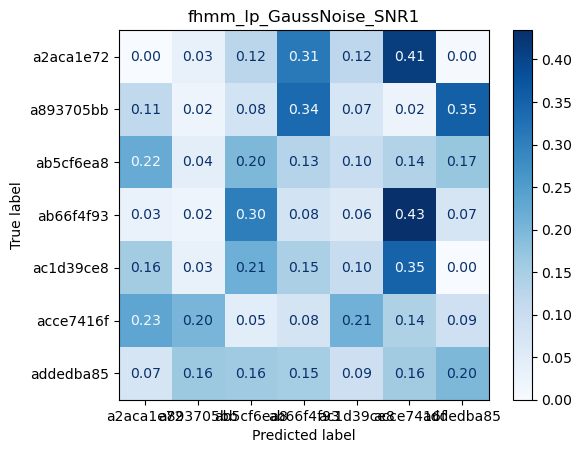

  Testing for: lp_GaussNoise_SNR10


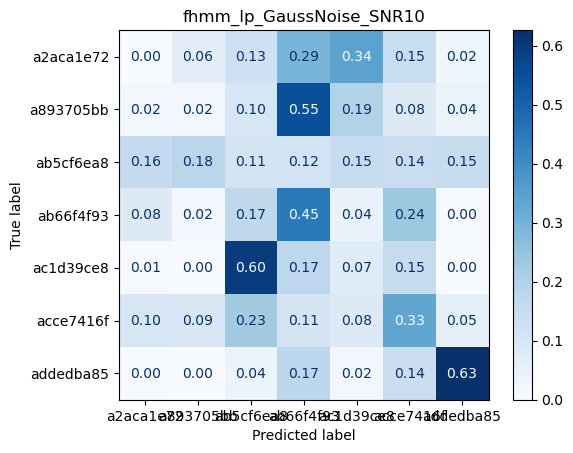

  Testing for: lp_GaussNoise_SNR20


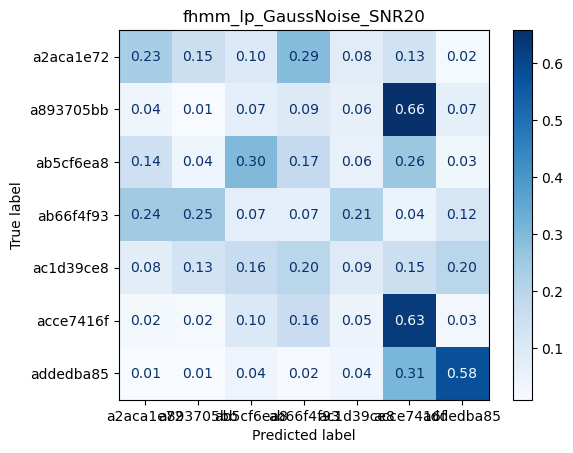

  Testing for: lp_GaussNoise_SNR40


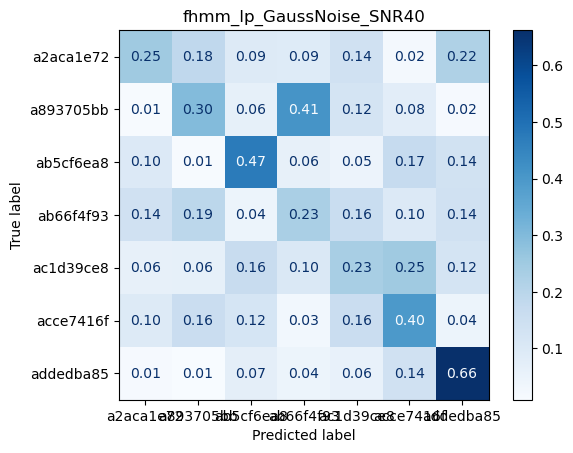

  Testing for: lp_GaussNoise_SNR5


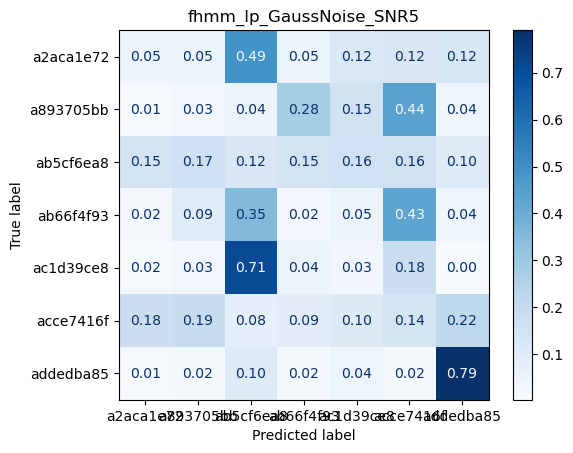

  Testing for: lp_GaussNoise_SNR60


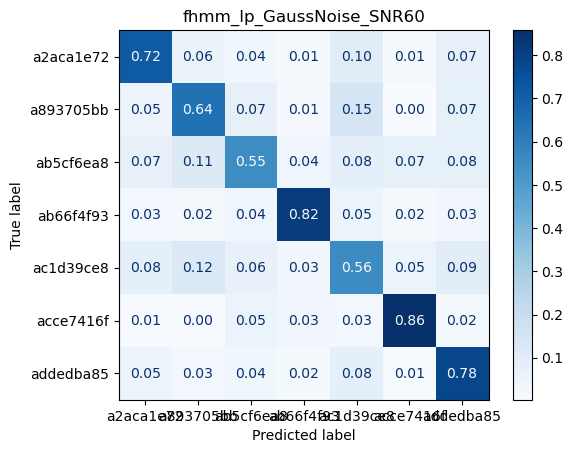

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR1


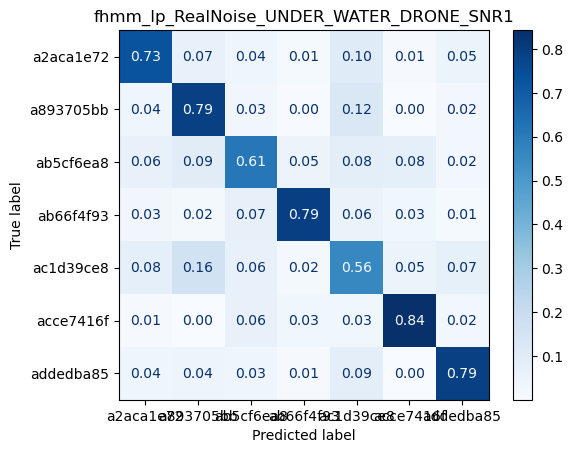

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR10


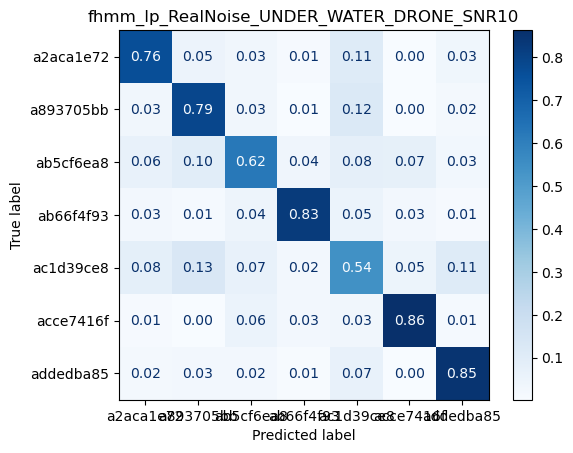

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR20


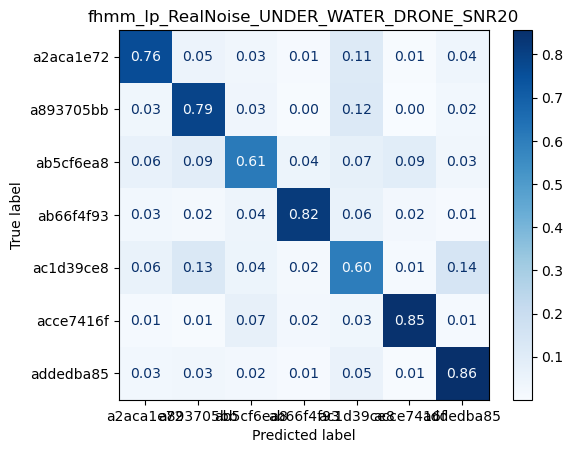

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR40


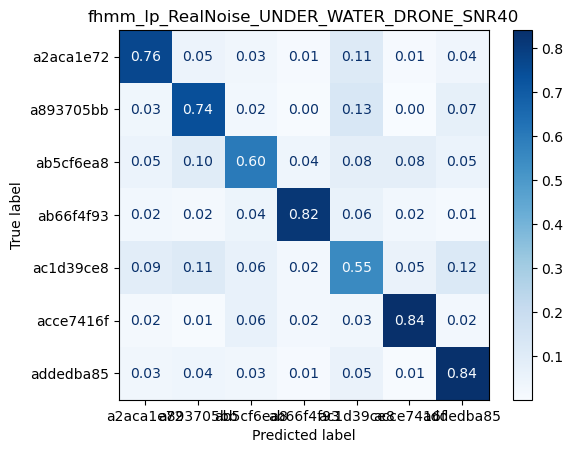

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR5


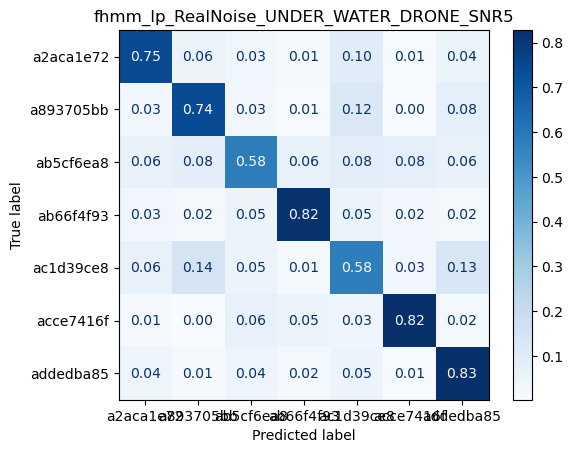

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR60


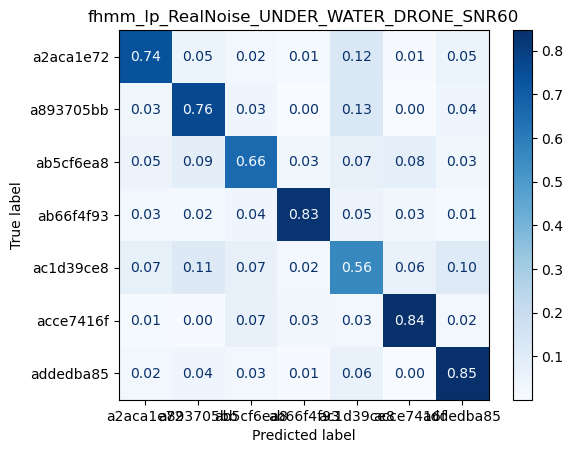

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands/results/classification_annotations_valg/fhmm' already exists, removing old files:  True
saving / updating  lp_GaussNoise_SNR1
saving / updating  lp_GaussNoise_SNR10
saving / updating  lp_GaussNoise_SNR20
saving / updating  lp_GaussNoise_SNR40
saving / updating  lp_GaussNoise_SNR5
saving / updating  lp_GaussNoise_SNR60
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR1
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR10
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR20
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR40
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR5
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR60
Execution time: 417.341994 seconds


In [24]:
import d_classifiers_to_results
reload(d_classifiers_to_results)
reload(utils)

start_time = time.time()

result_types = [
    'classification_annotations',
    # 'classification_buffer',
    'classification_annotations_valg',
    # 'classification_buffer_valg',
    ]
for result_type in result_types:
# result_type = result_types[3]
    results[result_type] = d_classifiers_to_results.get_classification_results(
        features, classifiers, sls, config.basedir, result_type, plot_cm=plot_cms, save_plots=save_cms, new_results=True, clean_results_dir=True, clean_plot_results=False)

end_time = time.time()
print(f"Execution time: {end_time - start_time:.6f} seconds")